# Model Prediction 

---

### Importing the libraries

In [39]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import  confusion_matrix, precision_score, recall_score, f1_score

In [2]:
df = pd.read_csv("cleaned_customer_booking.csv",index_col=0)
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


### Splitting the features and targets

In [3]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

### One Hot Encoding

In [4]:
categorical_features = ['sales_channel','trip_type']

In [5]:
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),categorical_features)],remainder='passthrough')

In [6]:
x_array = ct.fit_transform(x)

In [7]:
x = pd.DataFrame(x_array)

In [8]:
x.drop(columns=[10,11],inplace=True)

### Normalization

In [9]:
sc = StandardScaler()
x = sc.fit_transform(x)

In [10]:
x = pd.DataFrame(x)

In [11]:
x.sample(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
8535,0.356209,-0.356209,-0.048159,-0.088473,0.100913,0.398412,-0.599533,-0.095049,-1.120434,0.093532,-1.418343,-0.648803,-0.861602,-1.170901
5431,0.356209,-0.356209,-0.048159,-0.088473,0.100913,0.398412,2.321604,0.097675,-0.935678,1.097084,-1.418343,-0.648803,-0.861602,0.873170
41154,0.356209,-0.356209,-0.048159,-0.088473,0.100913,-0.580172,-0.599533,-0.634676,0.727123,1.598860,-1.418343,-0.648803,-0.861602,0.873170
9673,0.356209,-0.356209,-0.048159,-0.088473,0.100913,-0.580172,-0.110826,-0.133593,-0.750922,0.093532,0.705048,-0.648803,-0.861602,-1.104102
4838,0.356209,-0.356209,-0.048159,-0.088473,0.100913,-0.580172,0.322346,-0.017959,-0.196655,0.093532,0.705048,1.541299,1.160629,1.040170
22048,0.356209,-0.356209,-0.048159,-0.088473,0.100913,1.376996,0.366774,-0.095049,0.727123,0.595308,0.705048,1.541299,1.160629,-0.569704
26130,0.356209,-0.356209,-0.048159,-0.088473,0.100913,-0.580172,0.300132,-0.750311,-0.566167,0.595308,-1.418343,-0.648803,1.160629,-0.629823
15560,0.356209,-0.356209,-0.048159,-0.088473,0.100913,-0.580172,-0.755031,0.328944,-0.750922,-0.408244,0.705048,-0.648803,-0.861602,-1.518260
11583,0.356209,-0.356209,-0.048159,-0.088473,0.100913,-0.580172,0.788840,0.059131,0.172856,1.097084,-1.418343,-0.648803,1.160629,0.873170
33016,0.356209,-0.356209,-0.048159,-0.088473,0.100913,-0.580172,-0.377394,-0.673221,-0.750922,0.595308,-1.418343,-0.648803,-0.861602,-0.629823


In [12]:
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.356209,-0.356209,-0.048159,-0.088473,0.100913,0.398412,1.966181,-0.095049,-0.381411,1.097084,0.705048,-0.648803,-0.861602,-1.170901
1,0.356209,-0.356209,-0.048159,-0.088473,0.100913,-0.580172,0.300132,-0.056504,-1.120434,1.097084,-1.418343,-0.648803,-0.861602,-1.170901
2,0.356209,-0.356209,-0.048159,-0.088473,0.100913,0.398412,1.755148,0.020586,1.466146,-0.408244,0.705048,1.541299,-0.861602,-1.170901
3,0.356209,-0.356209,-0.048159,-0.088473,0.100913,-0.580172,0.122421,0.367489,-0.935678,1.097084,-1.418343,-0.648803,1.160629,-1.170901
4,0.356209,-0.356209,-0.048159,-0.088473,0.100913,0.398412,-0.188575,0.020586,1.096634,-0.408244,0.705048,-0.648803,1.160629,-1.170901


In [13]:
x = x.rename(columns={0:'Internet', 1:'Mobile',2:'CircleTrip', 3:'OneWayTrip',4:'RoundTRip',5:"num_passengers",6:"purchase_lead",7:"length_of_stay",8:"flight_hour",9:"flight_day",12:'wants_extra_baggage',13:'wants_preferred_seat',14:'wants_in_flight_meals',15:'flight_duration'})

In [14]:
x.columns

Index([            'Internet',               'Mobile',           'CircleTrip',
                 'OneWayTrip',            'RoundTRip',       'num_passengers',
              'purchase_lead',       'length_of_stay',          'flight_hour',
                 'flight_day',                     10,                     11,
        'wants_extra_baggage', 'wants_preferred_seat'],
      dtype='object')

In [15]:
x.columns = x.columns.astype(str)


In [16]:
scaled_df = x.join(y)
scaled_df.head()

,Internet,Mobile,CircleTrip,OneWayTrip,RoundTRip,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,10,11,wants_extra_baggage,wants_preferred_seat,booking_complete
0,0.356209,-0.356209,-0.048159,-0.088473,0.100913,0.398412,1.966181,-0.095049,-0.381411,1.097084,0.705048,-0.648803,-0.861602,-1.170901,0.0
1,0.356209,-0.356209,-0.048159,-0.088473,0.100913,-0.580172,0.300132,-0.056504,-1.120434,1.097084,-1.418343,-0.648803,-0.861602,-1.170901,0.0
2,0.356209,-0.356209,-0.048159,-0.088473,0.100913,0.398412,1.755148,0.020586,1.466146,-0.408244,0.705048,1.541299,-0.861602,-1.170901,0.0
3,0.356209,-0.356209,-0.048159,-0.088473,0.100913,-0.580172,0.122421,0.367489,-0.935678,1.097084,-1.418343,-0.648803,1.160629,-1.170901,0.0
4,0.356209,-0.356209,-0.048159,-0.088473,0.100913,0.398412,-0.188575,0.020586,1.096634,-0.408244,0.705048,-0.648803,1.160629,-1.170901,0.0


### Correlation Matrix

<Axes: >

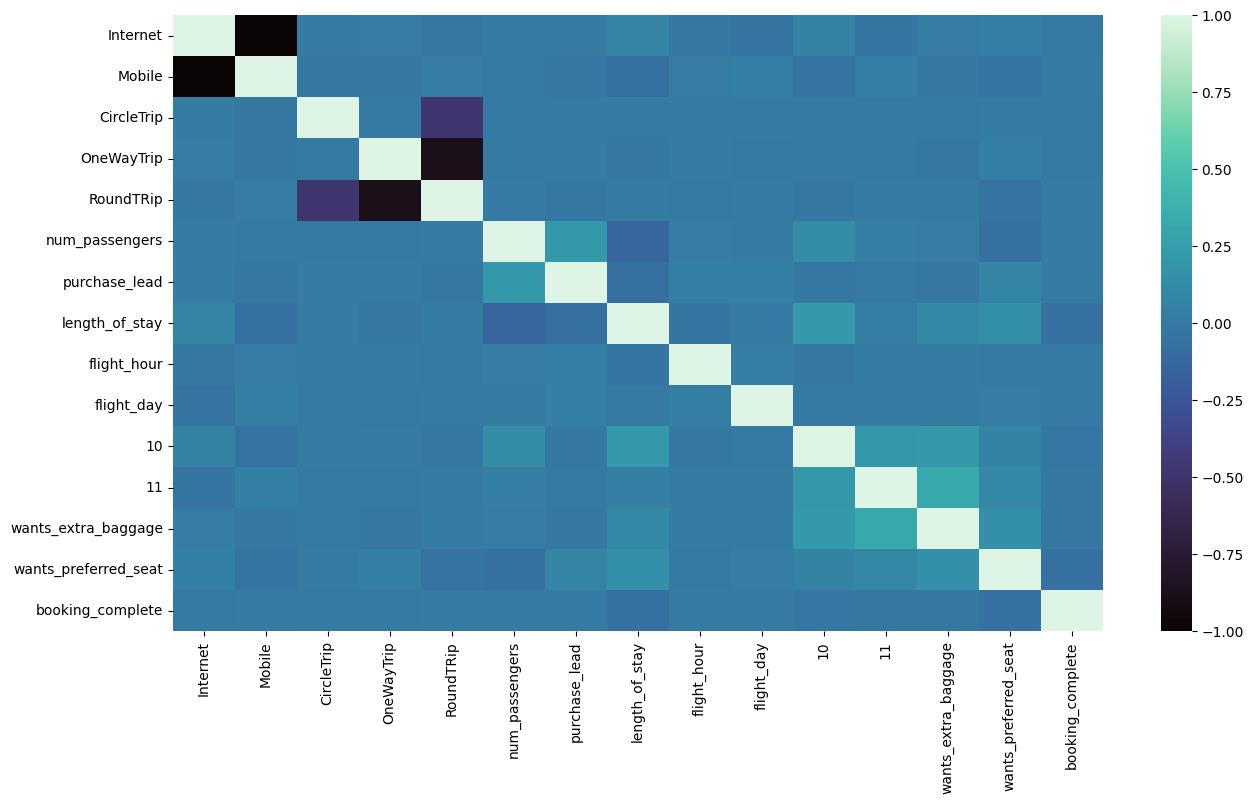

In [17]:
plt.figure(figsize=(15,8))
sns.heatmap(scaled_df.corr(),cmap='mako')

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test= train_test_split(x,y,test_size=0.2,random_state=42)

In [19]:
classifiers = [
    ('Random Forest', RandomForestClassifier(n_estimators=10,criterion='gini')),
    ('Logistic Regression', LogisticRegression(random_state=0)),
    ('Support Vector Machine', SVC(kernel='rbf',random_state=0)),
    ('K-Nearest Neighbors', KNeighborsClassifier(n_neighbors=5)),
    ('Decision Tree', DecisionTreeClassifier(criterion='gini',max_depth=10))
]

In [20]:
predictions = {}
accuracy = {}

for name, model in classifiers:
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    predictions[name]=y_pred
    res = accuracy_score(y_true=y_test,y_pred=y_pred)
    accuracy[name]=res
    print(f"{name} Accuracy: {res:.4f}")


Random Forest Accuracy: 0.8443
Logistic Regression Accuracy: 0.8500


Support Vector Machine Accuracy: 0.8500
K-Nearest Neighbors Accuracy: 0.8317
Decision Tree Accuracy: 0.8421


In [21]:
correct_freq = {name: (pred == y_test).sum() for name, pred in predictions.items()}
best_classifier = max(correct_freq, key=correct_freq.get)
best_accuracy = correct_freq[best_classifier] / len(y_test)
print(f"\nThe best classifier is '{best_classifier}' with accuracy: {best_accuracy:.4f}")


The best classifier is 'Logistic Regression' with accuracy: 0.8500


In [22]:
model = LogisticRegression(random_state=0)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

cm = confusion_matrix(y_true=y_test,y_pred=y_pred)
cm

array([[8449,    0],
       [1491,    0]], dtype=int64)

### Balancing the Dataset

In [23]:
scaled_df.booking_complete.value_counts()

booking_complete
0.0    42086
1.0     7312
Name: count, dtype: int64

In [24]:
scaled_df_0 = scaled_df[scaled_df['booking_complete']==0].sample(n=8000)
scaled_df_1 = scaled_df[scaled_df['booking_complete']==1]

In [25]:
new_scaled_df = pd.concat([scaled_df_1,scaled_df_0],ignore_index=True)

In [26]:
new_scaled_df.columns = new_scaled_df.columns.astype('str')

In [27]:
new_scaled_df = new_scaled_df.sample(frac=1).reset_index(drop=True)

In [28]:
new_scaled_df.head()

,Internet,Mobile,CircleTrip,OneWayTrip,RoundTRip,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,10,11,wants_extra_baggage,wants_preferred_seat,booking_complete
0,0.356209,-0.356209,-0.048159,-0.088473,0.100913,0.398412,-0.632854,-0.673221,0.727123,1.598860,-1.418343,-0.648803,-0.861602,-0.436104,0.0
1,0.356209,-0.356209,-0.048159,-0.088473,0.100913,-0.580172,-0.488464,-0.634676,1.096634,0.595308,-1.418343,-0.648803,-0.861602,0.198493,1.0
2,0.356209,-0.356209,-0.048159,-0.088473,0.100913,-0.580172,-0.532892,-0.634676,-0.566167,-1.411796,-1.418343,-0.648803,-0.861602,-1.738699,0.0
3,0.356209,-0.356209,-0.048159,-0.088473,0.100913,-0.580172,-0.655068,-0.673221,-0.011900,0.093532,0.705048,-0.648803,-0.861602,0.873170,0.0
4,0.356209,-0.356209,-0.048159,-0.088473,0.100913,-0.580172,2.266069,0.020586,0.172856,-1.411796,0.705048,-0.648803,1.160629,-1.104102,0.0


In [29]:
x = new_scaled_df.iloc[:,:-1]
y = new_scaled_df.iloc[:,-1]

In [30]:
x_train,x_test,y_train, y_test= train_test_split(x,y,test_size=0.2,random_state=42)

In [31]:
predictions_2 = {}
accuracy_2 = {}

for name, model in classifiers:
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    predictions_2[name]=y_pred
    res = accuracy_score(y_true=y_test,y_pred=y_pred)
    accuracy_2[name]=res
    print(f"{name} Accuracy: {res:.4f}")

Random Forest Accuracy: 0.5260
Logistic Regression Accuracy: 0.5524
Support Vector Machine Accuracy: 0.5527
K-Nearest Neighbors Accuracy: 0.5077
Decision Tree Accuracy: 0.5537


In [32]:
correct_freq = {name: (pred == y_test).sum() for name, pred in predictions_2.items()}
best_classifier = max(correct_freq, key=correct_freq.get)
best_accuracy = correct_freq[best_classifier] / len(y_test)
print(f"\nThe best classifier is '{best_classifier}' with accuracy: {best_accuracy:.4f}")


The best classifier is 'Decision Tree' with accuracy: 0.5537


In [33]:
model = DecisionTreeClassifier(criterion='gini',max_depth=10)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

cm = confusion_matrix(y_true=y_test,y_pred=y_pred)
cm

array([[907, 624],
       [725, 807]], dtype=int64)

In [40]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Precision: 0.5639
Recall: 0.5268
F1 Score: 0.5447


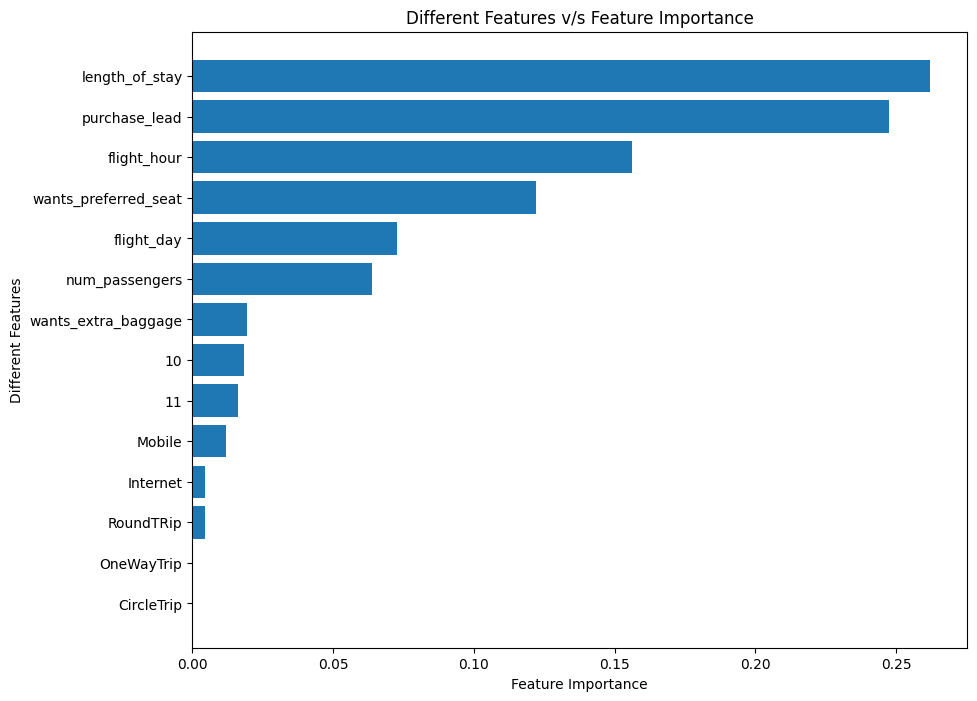

In [43]:
plt.figure(figsize=(10,8))
sorted_idx = model.feature_importances_.argsort()
plt.barh(scaled_df.iloc[:,:-1].columns[sorted_idx], model.feature_importances_[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Different Features")
plt.title("Different Features v/s Feature Importance")
plt.show()